In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/portrait_part_using_image_segmentation/

/content/drive/MyDrive/portrait_part_using_image_segmentation


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.2 MB/s 
     |████████████████████████████████| 120 kB 63.1 MB/s 
     |████████████████████████████████| 6.6 MB 43.5 MB/s 


In [4]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 5.0 MB/s 


In [5]:
# Loading Libraries

from transformers import pipeline
from PIL import Image, ImageFilter
import numpy as np
import os

In [6]:
# Model from hugging-face link-> https://huggingface.co/tasks/image-segmentation
model = pipeline("image-segmentation",model="facebook/detr-resnet-50-panoptic")

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


In [7]:
# Reading the image using PIL image

img = Image.open("./original_images/bull.jpg")

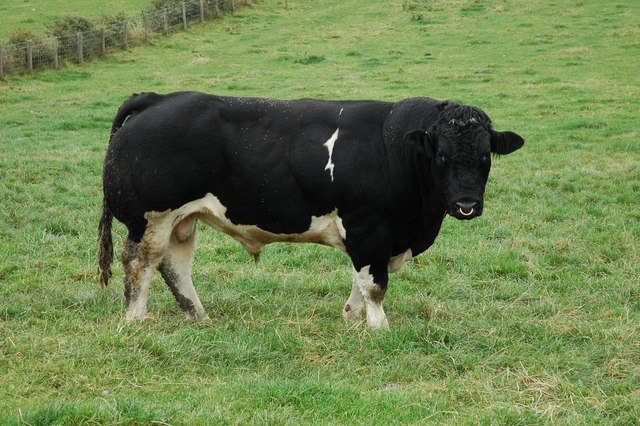

In [8]:
img

In [9]:
# predicting objects by passing the image in the model

predictions = model(img)

In [10]:
print(predictions)

[{'score': 0.9956589937210083, 'label': 'LABEL_185', 'mask': <PIL.Image.Image image mode=L size=640x426 at 0x7FB6C384BA90>}, {'score': 0.9997830986976624, 'label': 'LABEL_193', 'mask': <PIL.Image.Image image mode=L size=640x426 at 0x7FB6C384B0D0>}, {'score': 0.99981290102005, 'label': 'cow', 'mask': <PIL.Image.Image image mode=L size=640x426 at 0x7FB6C384B110>}]


In [11]:
for i in range(len(predictions)):
  print(f"{i}: {predictions[i]['label']}")

0: LABEL_185
1: LABEL_193
2: cow


In [14]:
objects = ['person', 'zebra', 'cow','car','road','potted plant','chair','LABEL_193']
x = [x for x in objects]
print(len(x))

8


In [15]:
for i in range(len(objects)):
    pred = predictions[2]
    # print(pred['label'])
    if pred['label'] == objects[i]:

        # converting masked image into array
        img1 = np.asarray(pred['mask'])/255
        # print("Image 1",img1)

        # converting whole 3 channel image into zero array
        img2 = np.zeros( ( np.array(img).shape[0], np.array(img).shape[1], 3 ) )
        # print(img2)

        # same value in each channel
        img2[:,:,0] = img1 
        img2[:,:,1] = img1
        img2[:,:,2] = img1
        # print(img2)

        # converting main image into numpy array
        image_array = np.asarray(img)
        print(image_array)

        # Segmented image array
        seg_img_array = image_array*(img2)

[[[126 156  84]
  [128 158  86]
  [126 156  84]
  ...
  [114 151  84]
  [115 151  87]
  [113 149  85]]

 [[122 156  80]
  [120 154  80]
  [119 151  78]
  ...
  [122 157  89]
  [120 157  90]
  [119 156  89]]

 [[124 161  84]
  [118 155  78]
  [117 153  79]
  ...
  [123 159  89]
  [123 158  90]
  [123 158  90]]

 ...

 [[ 76 119  39]
  [ 93 136  56]
  [ 78 121  39]
  ...
  [ 90 117  48]
  [120 143  73]
  [ 96 118  46]]

 [[ 80 107  30]
  [100 137  60]
  [104 148  73]
  ...
  [ 73  99  25]
  [131 162  92]
  [ 95 132  63]]

 [[ 90 117  40]
  [113 150  73]
  [117 161  86]
  ...
  [100 126  52]
  [ 91 122  52]
  [ 81 118  49]]]


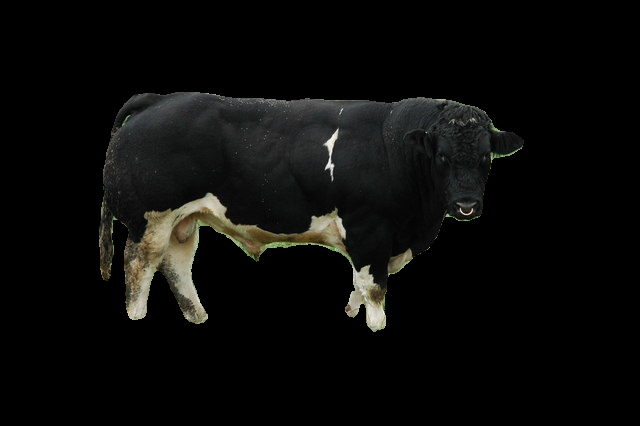

In [16]:
# Displaying Segmented Image
Image.fromarray(seg_img_array.astype(np.uint8))

In [17]:
# Taking the other black portion of the whole image

img3 = 1- img2
# print(img3)

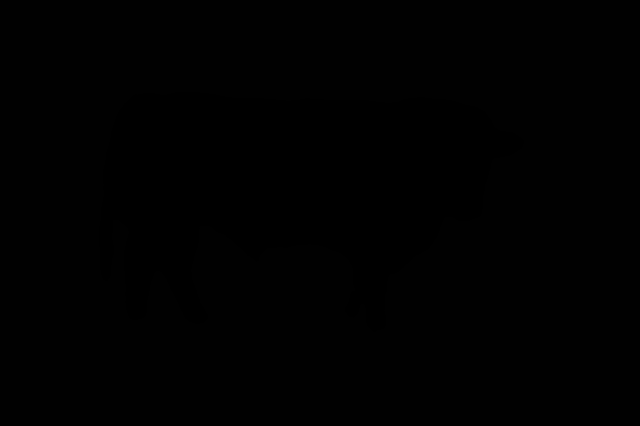

In [18]:
Image.fromarray(img3.astype(np.uint8))

In [19]:
# Blurring the whole image

blur_img = np.asarray(img.filter(ImageFilter.GaussianBlur(radius=10)))

In [20]:
# Applying Blur to the background portion

blur_image_reverse_mask = blur_img*img3
# print(blur_image_reverse_mask)

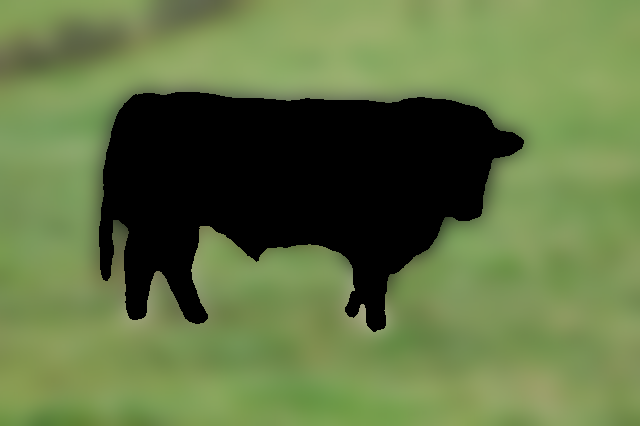

In [21]:
Image.fromarray(blur_image_reverse_mask.astype(np.uint8))

In [22]:
# adding up both blured background image and segmented image for portrait image

portrait_img = blur_image_reverse_mask.astype(np.uint8)+seg_img_array.astype(np.uint8)

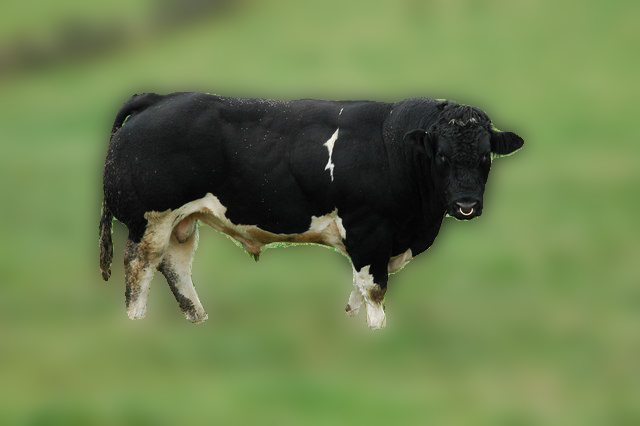

In [23]:
Image.fromarray(portrait_img)